In [5]:
import os
from glob import glob
import numpy as np
import mne 
import pandas as pd

from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

from mne.io import read_raw_ctf
from mne.preprocessing import annotate_muscle_zscore
from mne.preprocessing import find_eog_events
from mne.preprocessing import find_ecg_events
from mne.preprocessing import ica_find_ecg_events

print(mne.__file__)
print(mne.__version__)

C:\Users\Lenovo\anaconda3\lib\site-packages\mne\__init__.py
0.23.4


In [2]:
# Configure the graphics engine
from matplotlib import pyplot as plt
plt.rc('figure', max_open_warning=100)
%matplotlib notebook
#%matplotlib widget
#from mayavi import mlab  # Mayavi is used for 3D graphics
#%gui qt
#mlab.init_notebook('ipy')  # This instructs Mayavi to render in the background and send png graphics to the browser
#print('From now on, all graphics will send to your browser.')

In [3]:
print(os.getcwd())

if not os.path.exists('work_data'):
    os.mkdir('work_data')

C:\Users\Lenovo\PycharmProjects\Tibet


Extracting EDF parameters from C:\Users\Lenovo\PycharmProjects\Tibet\work_data\m11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 522999  =      0.000 ...  1045.998 secs...
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'ecg']
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 70.0 Hz
 meas_date: 2020-03-01 11:58:04 UTC
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
>


<IPython.core.display.Javascript object>


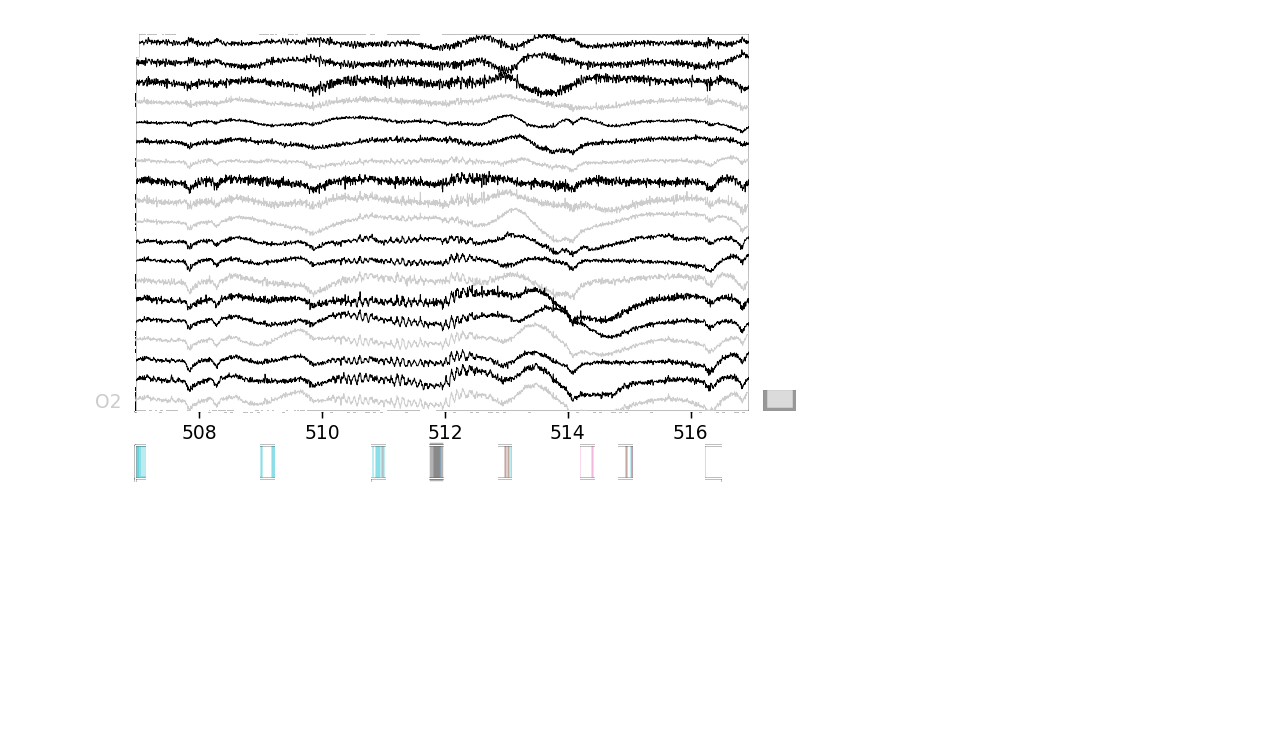

In [4]:
Fchan=['Fpz', 'Fp1', 'Fp2','Fz']
C_chan=['Cz', 'C3','C4','C1', 'C2']
P_chan=['Pz', 'P3', 'P4', 'P8', 'P7', 'P6', 'P5', 'P1', 'P2']
PO_chan=['POz', 'PO3', 'PO7','PO4', 'PO8'] 
O_chan= ['Oz', 'O1', 'O2']
Cz_chan=['CPz','FCz']

ECG_ch =['ecg']
EOG_ch = ['Fp1','Fp2','Fpz']
change_types = dict(zip(EOG_ch,["eog","eog","eog"]))

data = mne.io.read_raw_edf(os.path.join('work_data', r"m11.edf"), preload=True)
annot = mne.read_annotations(os.path.join('work_data', r'm11-annot.csv'))
data.set_annotations(annot)

print(data.info.ch_names)
print(data.info)

data_eog = data.copy().pick_channels(EOG_ch)
data_ecg = data.copy().pick_channels(ECG_ch)

data.drop_channels('ecg').set_montage('standard_1020')
#data.set_channel_types(change_types)

data.plot(scalings = dict(eeg=100e-6, eog=150e-6), duration=10)
print()

<IPython.core.display.Javascript object>


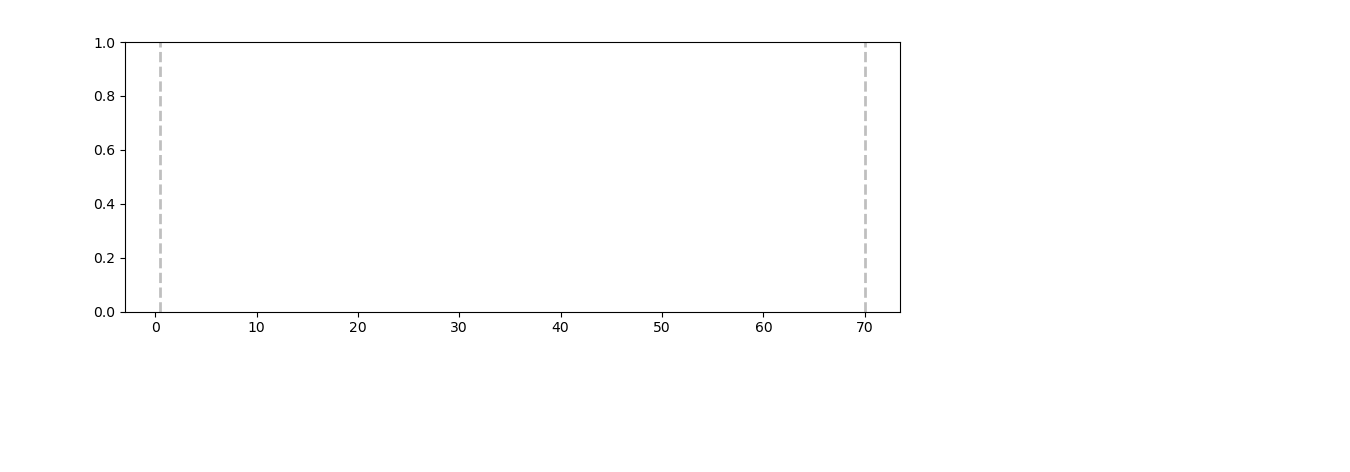

Setting 4546 of 523000 (0.87%) samples to NaN, retaining 518454 (99.13%) samples.
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>

In [5]:
#data_eog.plot(scalings = dict(eeg=200e-6),duration=10)
data.plot_psd(fmin=0, fmax=55)

Using EOG channel: Fp2
EOG channel index for this subject is: [1]
Omitting 4546 of 523000 (0.87%) samples, retaining 518454 (99.13%) samples.
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 213 significant peaks
Number of EOG events detected: 213
Not setting metadata
Not setting metadata
213 matching events found
Setting baseline interval to [-0.5, -0.2] sec
Applying baseline correction (mode: mean)
Loading data fo

<IPython.core.display.Javascript object>


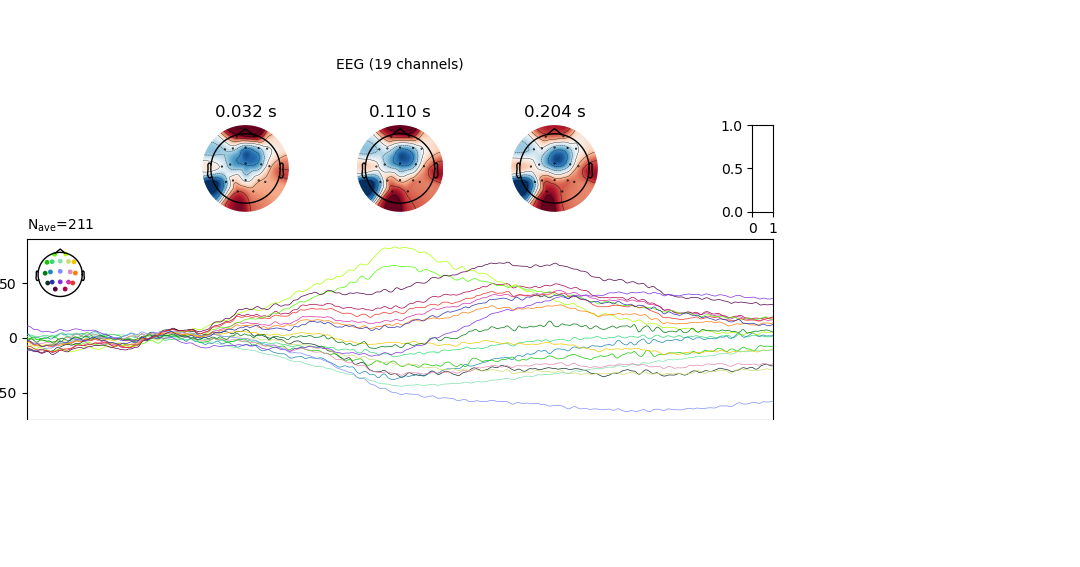

<IPython.core.display.Javascript object>

In [6]:
# is there blinks? 
eog_evoked = create_eog_epochs(data, event_id=900,
                               ch_name="Fp2", picks='eeg',
                               #tmin=-0.5, tmax=0.5, 
                               #l_freq=1, h_freq=10, 
                               reject_by_annotation=True, #flat=None, 
                               baseline=(None, -0.2) ).average()
eog_evoked.plot_joint()

Using EOG channel: Fp1
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 45 significant peaks
Number of EOG events detected: 45
Using EOG channel: Fp2
EOG channel index for this subject is: [1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two

<IPython.core.display.Javascript object>


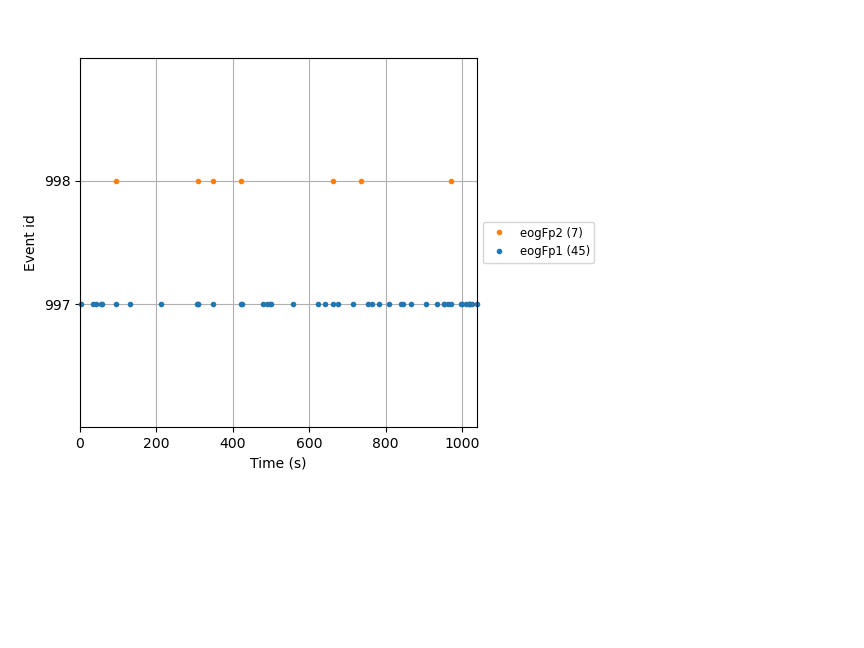

<IPython.core.display.Javascript object>


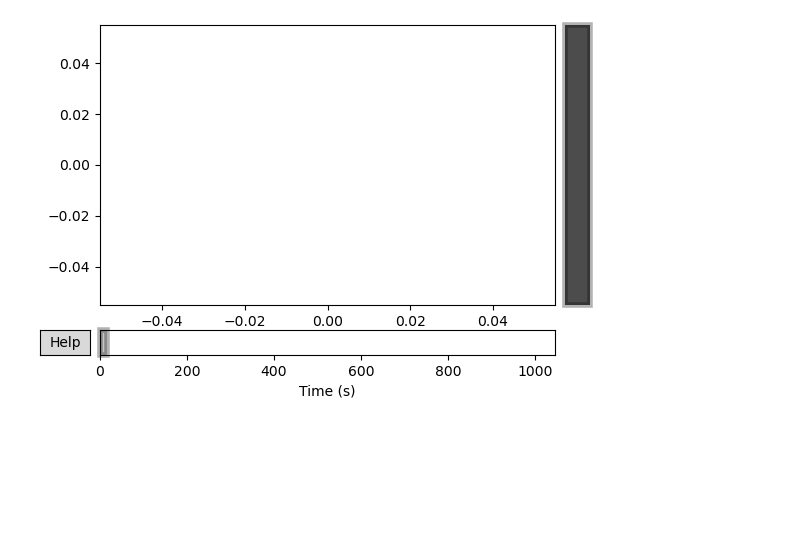

Not setting metadata
Not setting metadata
7 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 7 events and 501 original time points ...
3 bad epochs dropped
No projector specified for this dataset. Please consider the method self.add_proj.


<IPython.core.display.Javascript object>


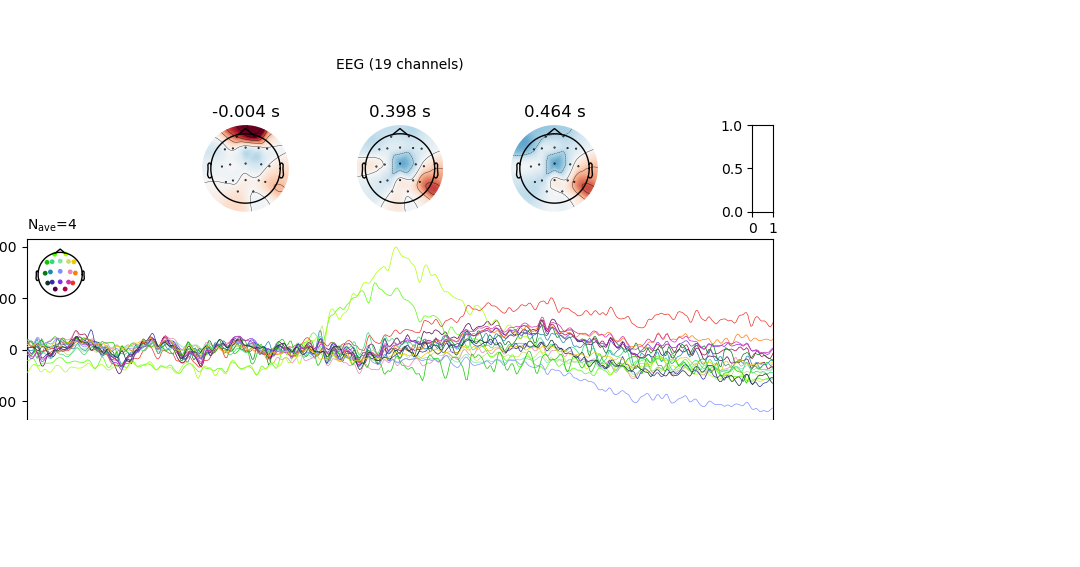

In [7]:
# eog_events

# find blinks
ev_eogFp1 = find_eog_events(data_eog, event_id=997, 
                                           l_freq=1, h_freq=10, 
                                           filter_length='10s', 
                                           ch_name="Fp1", 
                                           tstart=0, 
                                           reject_by_annotation=False, 
                                           thresh=None, verbose=None)

ev_eogFp2 = find_eog_events(data_eog, event_id=998, 
                                           l_freq=1, h_freq=10, 
                                           filter_length='10s', 
                                           ch_name="Fp2", 
                                           tstart=0, 
                                           reject_by_annotation=False, 
                                           thresh=None, verbose=None)

eog_events = np.vstack((ev_eogFp1, ev_eogFp2))
eog_events = eog_events[eog_events[:,0].argsort()]

#check
plot=True
if plot: 
    fig = mne.viz.plot_events(eog_events, sfreq=500.0,
                              first_samp=data.first_samp, 
                              event_id={"eogFp1":997, "eogFp2":998, }#"ecg":999,}, 
                             )
    fig.subplots_adjust(right=0.7)  # make room for legend
    
    
    eog_annot = mne.annotations_from_events(eog_events, 500.0, 
                                          event_desc= {997:"Fp1", 998:"Fp2"}, 
                                          orig_time = data.annotations.orig_time)
    data.set_annotations(data.annotations+eog_annot)

    data.plot(start=0, duration=15, #color='gray',                                                                
         scalings = dict(eeg=70e-6,#
                         eog=150e-6,))
    
    
    evoked_eog = mne.Epochs(data, ev_eogFp2.astype(int),
                            #detrend=1,
                            decim=1,
                            event_repeated='merge',
                            #baseline=(-0.15,0.0),
                            tmin=-0.5, tmax=0.5, 
                            preload=True).average()
    evoked_eog.plot_joint()
    
    
    #data.plot(events=eog_events, start=5, duration=20, color='gray',
         #event_color={997: 'r', 998: 'b',},# 999: 'm',})
         #scalings = dict(eeg=70e-6, eog=150e-6,))

#only 28 blinks found (in the beginning and in the end of recording) -- no need to perform ICA for ocular artifacts.

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 sec)



<IPython.core.display.Javascript object>


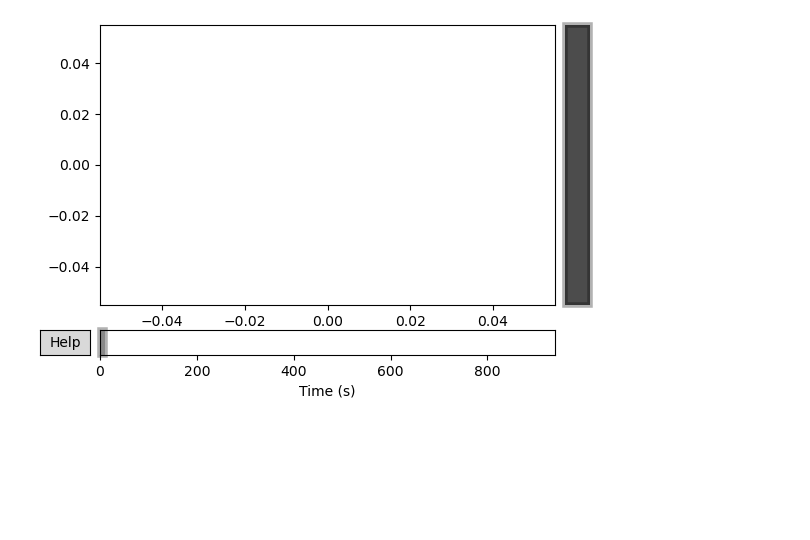

<IPython.core.display.Javascript object>


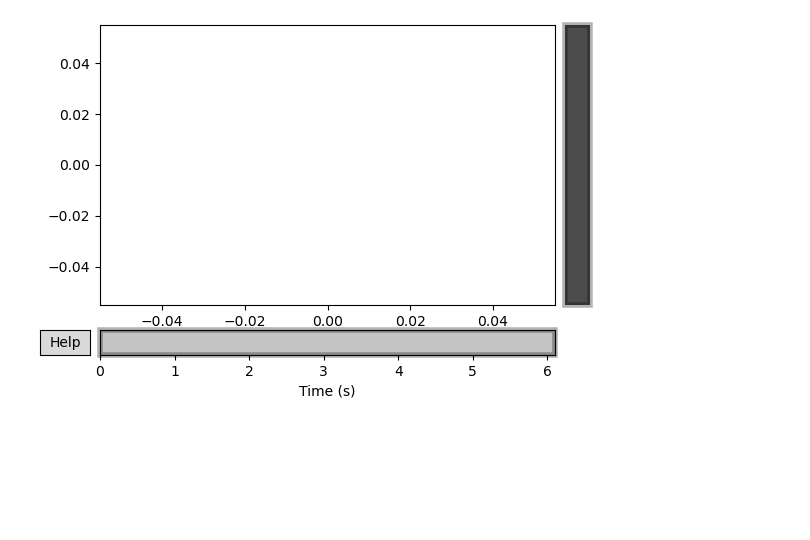

<IPython.core.display.Javascript object>


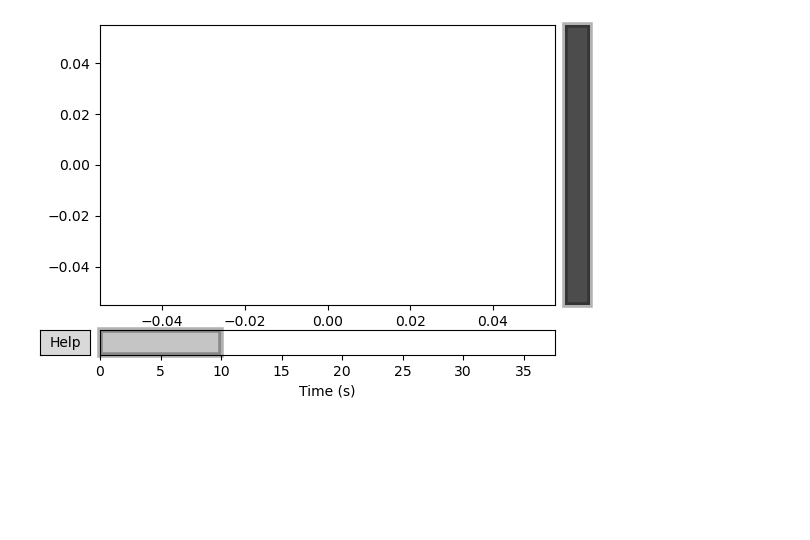

<IPython.core.display.Javascript object>

In [8]:
data.notch_filter([50,100])

data_start = data.copy().crop(tmin=0.4, tmax=6.5, include_tmax=True)
data_end = data.copy().crop(tmin=946.0,tmax=983.6)

data.crop(tmin=6.5, tmax=946.0, include_tmax=True)
data_eog.crop(tmin=6.5, tmax=946.0, include_tmax=True)

data.plot(scalings = dict(eeg=40e-6, eog=100e-6,))
data_start.plot(scalings = dict(eeg=40e-6, eog=100e-6,))
data_end.plot(scalings = dict(eeg=40e-6, eog=100e-6,))

# ICA preparations

## interp bad_channels

Interpolating bad channels
    Automatic origin fit: head of radius 91.5 mm
Computing interpolation matrix from 17 sensor positions
Interpolating 2 sensors


<IPython.core.display.Javascript object>


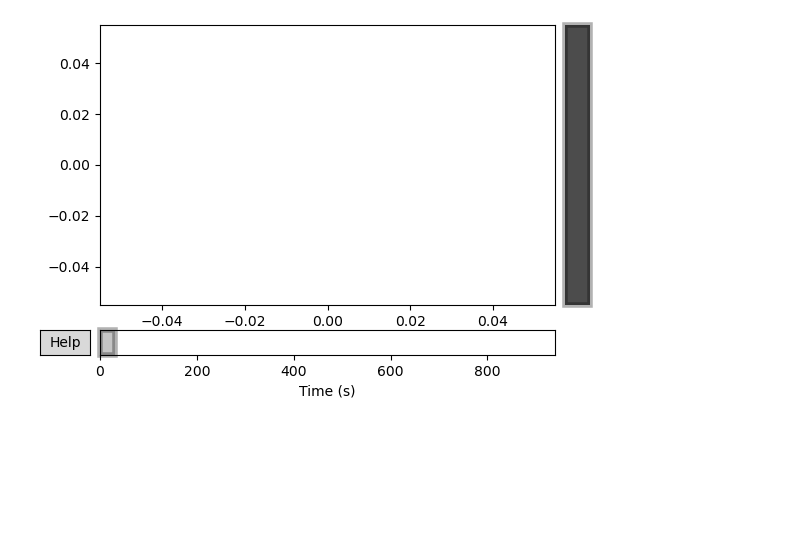

<IPython.core.display.Javascript object>


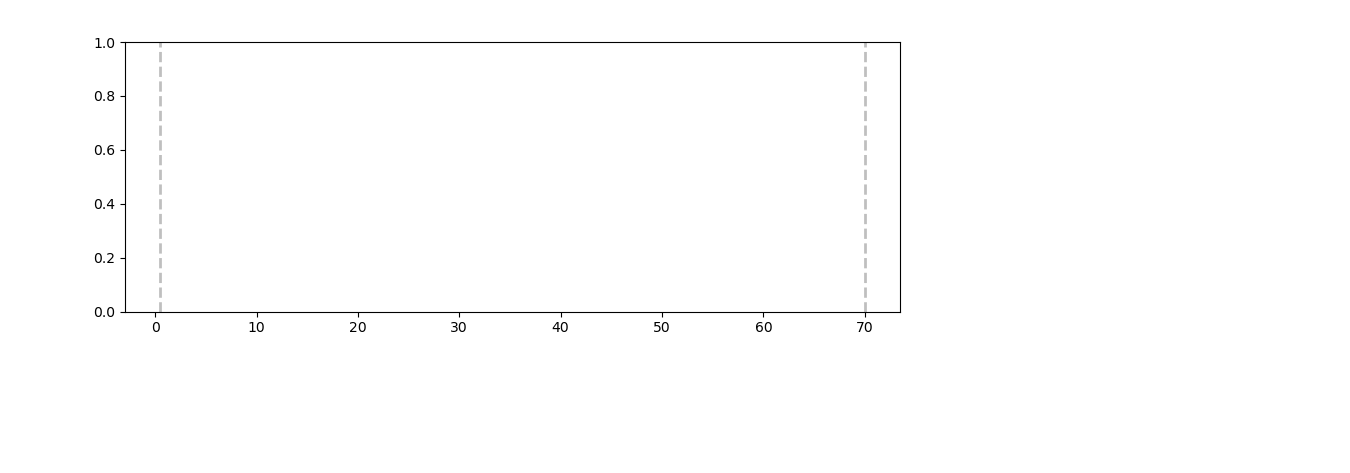

Setting 2307 of 469751 (0.49%) samples to NaN, retaining 467444 (99.51%) samples.
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>

In [9]:
data_interp = data.copy()
data_interp.info['bads']=["F4","F8"]
data_interp.interpolate_bads(reset_bads=True)

data_interp.plot(scalings = dict(eeg=40e-6, eog=150e-6,),duration=30)
data_interp.plot_psd(fmin=0, fmax=55)

## Annotate muscles -- m10 not used

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


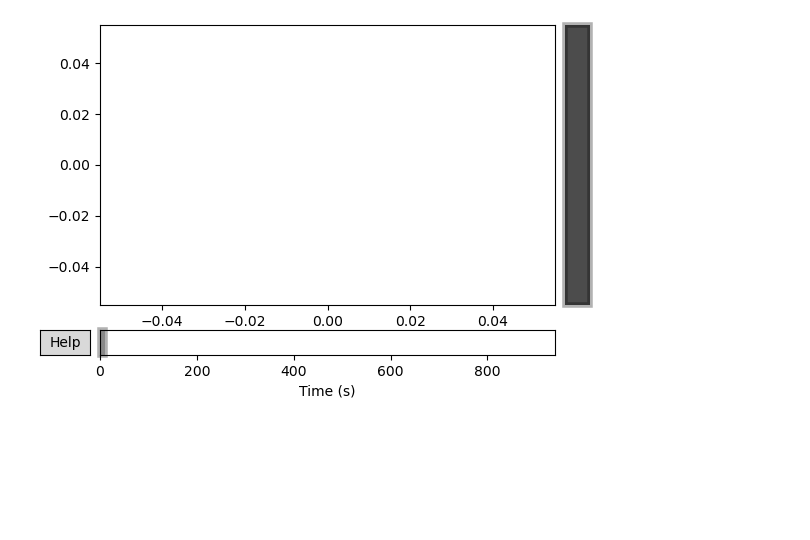

<IPython.core.display.Javascript object>

In [10]:
# annotate muscles -- not used
data_interp_muscles = data_interp.copy()
data_interp_muscles.filter(1, None, fir_design='firwin')
data_interp_muscles.notch_filter([50, 100, 60])

threshold_muscle = 6

annot_muscle, scores_muscle = annotate_muscle_zscore(
    data_interp_muscles, ch_type="eeg", threshold=threshold_muscle, min_length_good=3.0,
    filter_freq=[110, 140],)

fig, ax = plt.subplots()
ax.plot(data_interp_muscles.times, scores_muscle)
ax.axhline(y=threshold_muscle, color='r')
ax.set(xlabel='time, (s)', ylabel='zscore', title='Muscle activity')


#data_interp_muscles = data.copy()
data_interp_muscles.set_annotations(annot_muscle)
data_interp_muscles.plot(#events=events, event_color={1: 'b', 2: 'orange', 4: 'g', 8: 'r'},                                       
                  scalings = dict(eeg=140e-6, eog=150e-6,))

In [11]:
#customize line116-319-335__artifact_detection.py !

print(annot_muscle.orig_time)
data_interp.set_annotations(data_interp.annotations+annot_muscle)
#or
#annot_with_muscles = mne.read_annotations(r'fif_for_ERP/annot/Pilot_3tones_left-right-annot.csv')
#data_interp.set_annotations(annot_with_muscles)

data_interp.plot(scalings = dict(eeg=100e-6, eog=150e-6,))


None


ValueError: orig_time should be the same to add/concatenate 2 annotations (got 2020-03-01 11:58:04+00:00 != None)

### filter before ICA

In [ ]:
data_ica = data.copy()#original data

filt_interp = data_interp.copy() #data for ICA components generation
filt_interp.filter(l_freq=4, h_freq=None)#30)

filt_interp.plot(scalings = dict(eeg=50e-6, eog=150e-6,))

In [ ]:
ica99 = ICA(n_components=0.99, max_iter=1000, random_state=97,)
ica99.fit(filt_interp, 
        #reject= dict(eeg=120e-6,),
        reject_by_annotation=True,
        flat=None, tstep=2.0,
        picks='eeg', 
        start=None, stop=None, decim=None, 
        )
'''
reject = dict(eeg=40e-6,      # unit: V (EEG channels))
'''
ica99.plot_sources(filt_interp)

In [ ]:
ica99.plot_components()

In [ ]:
ica99.plot_overlay(data, exclude=[3, #ecg
                                        ], 
                   picks='eeg')

In [ ]:
data_ica = data.copy()
ica99.plot_properties(data_ica, picks=[2,3])

In [ ]:
# does not work - do not use 

# find which ICs match the ECG pattern
#ecg_indices, ecg_scores = ica99.find_bads_ecg(data_ica, ch_name="T5",
#                                              method='correlation', 
#                                              threshold=0.25)
#ica99.exclude = ecg_indices

In [ ]:
# check ecg component

ecg_indices = [3]

# Extract the time courses of these components and add them as channels to the raw data. 
# Think of them the same way as EOG/EKG channels
ecg_comps = ica99.get_sources(data_ica).get_data()


data_ica_test = data.copy()
data_ica_test[0,:]=ecg_comps[3]
data_ica_test.pick_channels(['Fp1']).plot_psd(fmin=0, fmax=25) 


ev_ecg = ica_find_ecg_events(data_ica, 
                             ecg_comps[3], 
                             event_id=999, 
                             tstart=0.0, 
                             l_freq=5, h_freq=35, 
                             qrs_threshold='auto', verbose=None
                             )
print(np.unique(ev_ecg[:,2]))

# check cardiac rythm, compute average heart rate
q, r = np.unique(ev_ecg[1:,0]-ev_ecg[:-1,0], return_counts=True)
q=q[r.argsort()]
r=r[r.argsort()]
#print(q[-15:])
#print(r[-15:])

l = len(q)
print(l)
k =0.3
ratio = int(k*l)
#print(np.max(q[-ratio:]), np.min(q[-ratio:]))
#print(r[-ratio:])
heart_rate = np.sum(np.multiply(q[-ratio:],r[-ratio:])/np.sum(r[-ratio:]))*2 #2ms = 1/Fs = 2/50 Hz
print("taken:{}/{}".format(np.sum(r[-ratio:]), len(ev_ecg)))

print('Heart_rate_ave = {:f} ms'.format(heart_rate))
print('Heart_rate_ave = {:f} beats/min'.format(60*1e3/heart_rate))


#print("\CHECK")
q_dif=ev_ecg[1:,0]-ev_ecg[:-1,0]

q_, idx_, r_ = np.unique(q_dif, return_counts=True, return_index=True)
#print(q_[q_.argsort()])
#print(len(q_))

ev_ecg2 = ev_ecg.copy()[1:,:]
print(np.unique(ev_ecg2[:,-1]))

_ =ev_ecg2[:,-1]
_[:] = 0
print(np.unique(_))

id30 = np.argwhere(q_dif<=300)
_[id30]=30

id35 = np.argwhere((q_dif>300)&(q_dif<=350))
_[id35]=35

id40 = np.argwhere((q_dif>350)&(q_dif<=400))
_[id40]=40

id45 = np.argwhere((q_dif>400)&(q_dif<=450))
_[id45]=45

id50 = np.argwhere((q_dif>450)&(q_dif<=500))
_[id50]=50

id73 = np.argwhere((q_dif>500)&(q_dif<=730))
_[id73]=73

id95 = np.argwhere((q_dif>730)&(q_dif<=950))
_[id95]=90

id1 = np.argwhere((q_dif>950)&(q_dif<=1250))
_[id1]=100

id12 =np.where(q_dif>1250)
_[id12]=120


ev_ecg2[:,-1] = _


#visualize
plot=True
if plot: 
    fig = mne.viz.plot_events(ev_ecg2, sfreq=500.0,
                              first_samp=data.first_samp, 
                              event_id={"heart_freq less 300 ms":30, 
                                        "l 350 ms":35,
                                        "l 400 ms":40,
                                        "l 450 ms":45,
                                        "l 500 ms":50,
                                        "l 730 ms":73,
                                        "l 800 ms":90,
                                        "l 1000 ms":100,
                                        "l 1200 ms":120,
                                       # "hb299":999,
                                       }, 
                              #event_id={"ECG":999 }, 
                             )
    fig.subplots_adjust(right=0.7)  # make room for legend
    
    
    evoked_ECG = mne.Epochs(data_ica, ev_ecg.astype(int),
                            #detrend=1,
                            decim=1,
                            #baseline=(-0.15,0.0),
                            tmin=-0.3, tmax=0.4, 
                            preload=True).average()
    evoked_ECG.plot_joint()
    
    
    
    ev_annot = mne.annotations_from_events(ev_ecg, 500.0, #ev_ecg2
                                    event_desc= {
                                        #30:"hr300 ms", 
                                        #35:"350 ms",
                                        #40:"400 ms",
                                        #45:"l450 ms",
                                        #50:"500 ms",
                                        #73:"730 ms",
                                        #90:"800 ms",
                                        #100:"1000 ms",
                                        #120:"1200 ms",
                                        999:"HR",
                                       }, 
                                    orig_time = data_ica.annotations.orig_time)
    data_ica_test.set_annotations(ev_annot)

    data_ica_test.filter(h_freq=25, l_freq=1).plot(start=0, duration=10, color='gray',                                                                
         scalings = dict(eeg=10.,#eeg=100e-1, 
                         eog=150e-6,))
    
    data_ica_test.plot_psd(fmin=0, fmax=25)  

In [ ]:
data_ica.set_annotations(data_ica.annotations+ev_annot)

ica99.exclude = [3]
ica99.apply(data_ica)
ica99.apply(data_start)
ica99.apply(data_end)
#data_ica_r = data_interp_r.copy()
#ica99.apply(data_ica_r)

data.plot(scalings = dict(eeg=40e-6, eog=150e-6,))
data_ica.plot(scalings = dict(eeg=40e-6, eog=150e-6,))

data_ica.save(r"m10_clean.fif" , overwrite=True)

In [ ]:
#concatenate in return
print(data_start.info['bads'])
print(data_ica.info['bads'])
data_ica.info['bads'] = []
print(data_end.info['bads'])

data123 = mne.concatenate_raws([data_start, data_ica, data_end], 
                                preload=True, 
                                       )
data123.plot(scalings = dict(eeg=40e-6, eog=150e-6,))
data123.save(r"m10_clean_all.fif", overwrite=True)